In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:

# Try reading the file, skipping problematic rows
df = pd.read_csv("/content/sales_data.csv")#, on_bad_lines='skip')

FileNotFoundError: [Errno 2] No such file or directory: '/content/sales_data.csv'

In [ ]:
df.head()

,customer_id,vehicle_id,purchase_date,policy_start_date,policy_end_date,premium_amount,vehicle_make,vehicle_model,vehicle_year,vehicle_value,customer_age,customer_gender,customer_location,coverage_type,agent_id,payment_method,discount_applied,total_coverage,policy_status,Sale
0,2053,2463,2019-10-04,2021-01-20,2021-04-05,777.70,Nissan,dOAatj,2022,11860,26,Female,H-575,Standard,270,Bank Transfer,290.02,41632.72,Expired,1
1,4197,3477,2019-12-17,2019-04-09,2020-02-27,422.66,Chevrolet,vKQXjR,2010,20586,39,Female,D-900,Standard,230,Credit Card,461.33,11825.26,Active,1
2,5807,1638,2020-05-30,2021-09-05,2022-05-12,1278.37,Ford,ATVUnz,2010,12433,57,Female,O-538,Premium,345,Bank Transfer,106.14,12784.14,Expired,1
3,9939,7328,2021-11-24,2019-09-03,2020-01-03,1236.17,Honda,RQeIhO,2006,34043,67,Female,C-601,Basic,131,Cash,499.68,21478.63,Cancelled,1
4,6963,2308,2019-07-19,2023-01-11,2021-02-27,1228.62,Nissan,DxUsiK,2022,28564,62,Male,Y-974,Standard,494,Cash,3.62,15095.22,Expired,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        100000 non-null  int64  
 1   vehicle_id         100000 non-null  int64  
 2   purchase_date      100000 non-null  object 
 3   policy_start_date  100000 non-null  object 
 4   policy_end_date    100000 non-null  object 
 5   premium_amount     100000 non-null  float64
 6   vehicle_make       100000 non-null  object 
 7   vehicle_model      100000 non-null  object 
 8   vehicle_year       100000 non-null  int64  
 9   vehicle_value      100000 non-null  int64  
 10  customer_age       100000 non-null  int64  
 11  customer_gender    100000 non-null  object 
 12  customer_location  100000 non-null  object 
 13  coverage_type      100000 non-null  object 
 14  agent_id           100000 non-null  int64  
 15  payment_method     100000 non-null  object 
 16  dis

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

customer_id          0
vehicle_id           0
purchase_date        0
policy_start_date    0
policy_end_date      0
premium_amount       0
vehicle_make         0
vehicle_model        0
vehicle_year         0
vehicle_value        0
customer_age         0
customer_gender      0
customer_location    0
coverage_type        0
agent_id             0
payment_method       0
discount_applied     0
total_coverage       0
policy_status        0
Sale                 0
dtype: int64

In [ ]:
date_cols = ['purchase_date', 'policy_start_date', 'policy_end_date']

In [ ]:
for column in date_cols:
    df[column] = pd.to_datetime(df[column])

In [ ]:
# calculate the policy duration
df['policy_duration'] = (df['policy_end_date'] - df['policy_start_date']).dt.days

In [ ]:
# extract the day month and year from purchase date
df['purchase_day'] = df['purchase_date'].dt.day
df['purchase_month'] = df['purchase_date'].dt.month
df['purchase_year'] = df['purchase_date'].dt.year

In [ ]:
# Drop the purchase, policy start and end column
df = df.drop(['purchase_date', 'policy_start_date', 'policy_end_date'], axis=1)

In [ ]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd


def hash_features(df, column, n_features):
    """
    Apply feature hashing to a categorical column in a DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data
    - column: the name of the column to hash
    - n_features: number of hash buckets (columns) to create

    Returns:
    - DataFrame with hashed features
    """
    # Initialize FeatureHasher
    hasher = FeatureHasher(n_features=n_features, input_type='string')

    # Convert the column to a list of strings
    column_data = df[column].astype(str).tolist()

    # Apply hashing
    hashed_features = hasher.transform(column_data)

    # Convert hashed features to DataFrame
    hashed_df = pd.DataFrame(hashed_features.toarray(), columns=[f'hash_{i}' for i in range(n_features)])

    # Drop the original column and concatenate hashed features
    df = df.drop(columns=[column])
    df = pd.concat([df, hashed_df], axis=1)

    return df

# Example usage
# Initialize OneHotEncoder with updated parameter
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Identify categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

print("Original DataFrame shape:", df.shape)

# Process each categorical column
for column in categorical_cols:
    try:
        print(f"Processing column: {column} with {df[column].nunique()} unique values")

        # Check if the number of unique values is greater than 10
        if df[column].nunique() > 10:
            print(f"Applying feature hashing to {column}")
            df = hash_features(df, column, n_features=10)
        else:
            print(f"Applying one-hot encoding to {column}")
            df_ohe = pd.DataFrame(ohe.fit_transform(df[[column]]), columns=ohe.get_feature_names_out([column]))
            df = pd.concat([df.drop(columns=[column]), df_ohe], axis=1)

        print(f"DataFrame shape after processing column {column}: {df.shape}")

    except Exception as e:
        print(f"Error processing column {column}: {e}")

print("Final DataFrame shape:", df.shape)


Original DataFrame shape: (100000, 21)
Processing column: vehicle_make with 5 unique values
Applying one-hot encoding to vehicle_make
DataFrame shape after processing column vehicle_make: (100000, 25)
Processing column: vehicle_model with 100000 unique values
Applying feature hashing to vehicle_model
Error processing column vehicle_model: Samples can not be a single string. The input must be an iterable over iterables of strings.
Processing column: customer_gender with 2 unique values
Applying one-hot encoding to customer_gender
DataFrame shape after processing column customer_gender: (100000, 26)
Processing column: customer_location with 23057 unique values
Applying feature hashing to customer_location
Error processing column customer_location: Samples can not be a single string. The input must be an iterable over iterables of strings.
Processing column: coverage_type with 3 unique values
Applying one-hot encoding to coverage_type
DataFrame shape after processing column coverage_type:

In [ ]:
print(df.shape)

(100000, 32)


In [ ]:
# Standardize the numerical columns
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'Sale']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

,customer_id,vehicle_id,premium_amount,vehicle_model,vehicle_year,vehicle_value,customer_age,customer_location,agent_id,discount_applied,...,customer_gender_Male,coverage_type_Basic,coverage_type_Premium,coverage_type_Standard,payment_method_Bank Transfer,payment_method_Cash,payment_method_Credit Card,policy_status_Active,policy_status_Cancelled,policy_status_Expired
0,-1.330954,-1.171971,-0.348979,dOAatj,1.508249,-1.058251,-1.265269,H-575,-0.259956,0.276364,...,-0.992568,-0.708279,-0.708184,1.418723,1.407379,-0.707038,-0.703747,-0.707356,-0.705750,1.412000
1,-0.502167,-0.781120,-1.370844,vKQXjR,-0.219184,-0.191277,-0.551750,D-900,-0.604737,1.463345,...,-0.992568,-0.708279,-0.708184,1.418723,-0.710541,-0.707038,1.420965,1.413715,-0.705750,-0.708215
2,0.120197,-1.489971,1.092033,ATVUnz,-0.219184,-1.001320,0.436200,O-538,0.386507,-0.997712,...,-0.992568,-0.708279,1.412063,-0.704859,1.407379,-0.707038,-0.703747,-0.707356,-0.705750,1.412000
3,1.717468,0.703264,0.970574,RQeIhO,-0.794995,1.145746,0.985061,C-601,-1.458068,1.729067,...,-0.992568,1.411873,-0.708184,-0.704859,-0.710541,1.414351,-0.703747,-0.707356,1.416933,-0.708215
4,0.567062,-1.231716,0.948844,DxUsiK,1.508249,0.601379,0.710630,Y-974,1.670814,-1.708058,...,1.007488,-0.708279,-0.708184,1.418723,-0.710541,1.414351,-0.703747,-0.707356,-0.705750,1.412000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   100000 non-null  float64
 1   vehicle_id                    100000 non-null  float64
 2   premium_amount                100000 non-null  float64
 3   vehicle_model                 100000 non-null  object 
 4   vehicle_year                  100000 non-null  float64
 5   vehicle_value                 100000 non-null  float64
 6   customer_age                  100000 non-null  float64
 7   customer_location             100000 non-null  object 
 8   agent_id                      100000 non-null  float64
 9   discount_applied              100000 non-null  float64
 10  total_coverage                100000 non-null  float64
 11  Sale                          100000 non-null  int64  
 12  policy_duration               100000 non-null

In [ ]:
# Identify columns with non-numerical values
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df.drop(columns=non_numeric_cols, inplace=True)

# GLM Model

In [ ]:
# Split data into features and target
X = df.drop(columns=['Sale'])  # Features
y = df['Sale']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
glm_model = LogisticRegression()
glm_model.fit(X_train, y_train)

# Make predictions
y_pred = glm_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.5987333333333333


<Axes: >

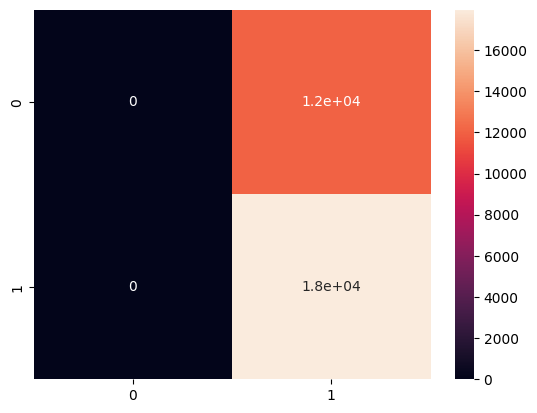

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Calcualte the Weight Class (To handle Imbalance in dataset)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming y_train is your training labels
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("Class weights:", class_weight_dict)


Class weights: {0: 1.2503125781445361, 1: 0.8331944675887352}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the logistic regression model with class weights
model = LogisticRegression(class_weight=class_weight_dict, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Check accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5041666666666667


<Axes: >

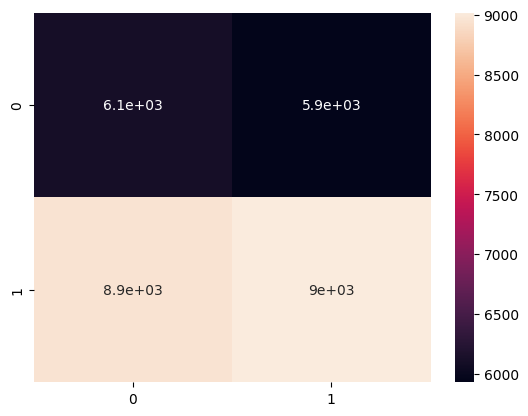

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
y_scores = model.predict_proba(X_test)[:,1]

In [ ]:
y_scores

array([0.48699693, 0.50542639, 0.48800711, ..., 0.51152489, 0.50784038,
       0.50212678])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [ ]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.50226980523117


In [ ]:
# Classify using the optimal threshold
y_pred = (y_scores >= optimal_threshold).astype(int)

<Axes: >

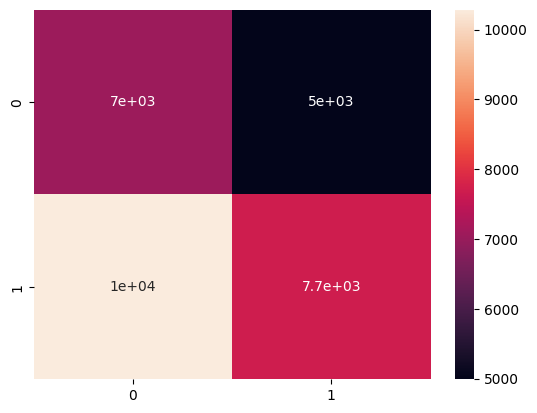

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.4909


# Comparing different thresholds

In [ ]:
# Compare different thresholds
def evaluate_threshold(threshold, y_scores, y_test):
    y_pred = (y_scores >= threshold).astype(int)
    return {
        "threshold": threshold,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0)
    }

thresholds = np.linspace(0, 1, 100)
results = [evaluate_threshold(threshold, y_scores, y_test) for threshold in thresholds]

# Print results for the optimal threshold
for res in results:
    if np.isclose(res['threshold'], optimal_threshold, atol=1e-3):
        print(f"Results for optimal threshold ({optimal_threshold}): {res}")

# Optional: Print results for all thresholds for comparison
for res in results:
    print(f"Threshold: {res['threshold']:.2f}, Accuracy: {res['accuracy']:.2f}, Precision: {res['precision']:.2f}, Recall: {res['recall']:.2f}, F1: {res['f1']:.2f}")

Threshold: 0.00, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.01, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.02, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.03, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.04, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.05, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.06, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.07, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.08, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.09, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.10, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.11, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.12, Accuracy: 0.60, Precision: 0.60, Recall: 1.00, F1: 0.75
Threshold: 0.13, Accuracy: 0.60, Precision: 0.60, R

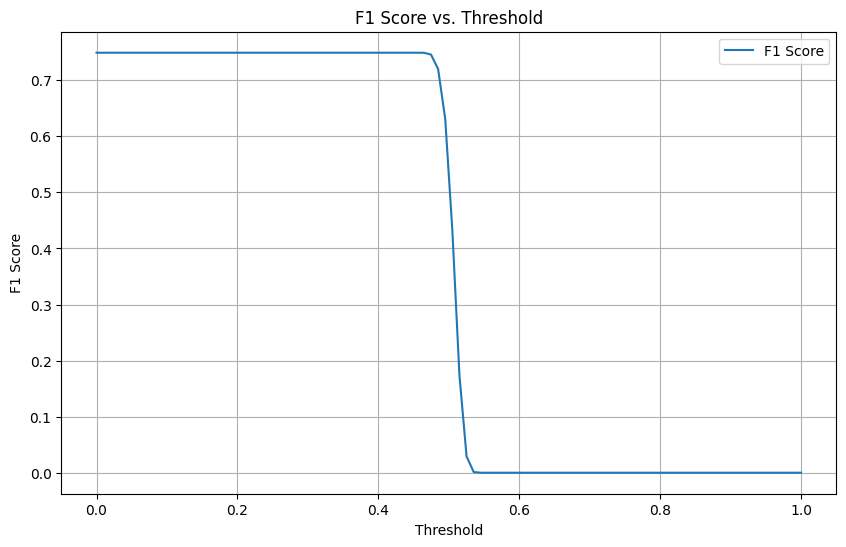

In [ ]:
import matplotlib.pyplot as plt

thresholds = np.linspace(0, 1, 100)
f1_scores = [res['f1'] for res in results]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


* Since the F1 score decreases drastically after 0.5, consider setting your optimal threshold around this value. This might give you the best trade-off between precision and recall.

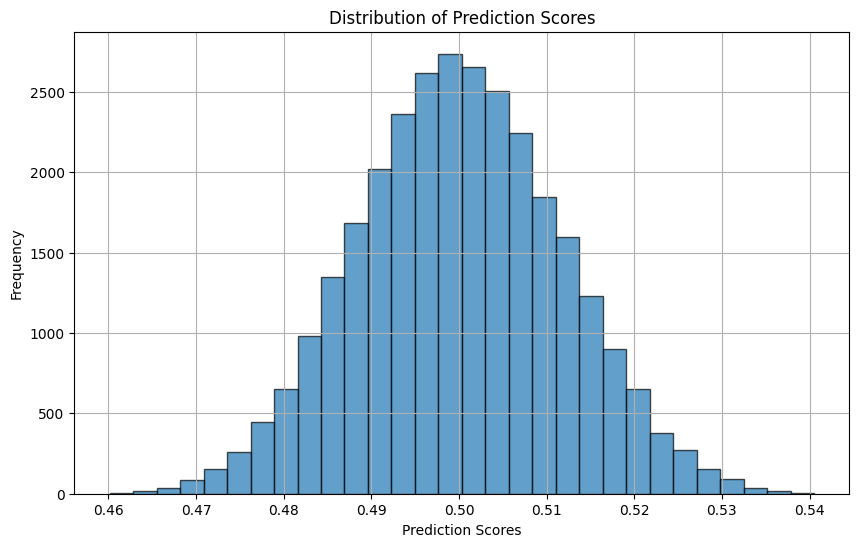

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_scores, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Scores')
plt.grid(True)
plt.show()


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, loguniform

# Define the parameter space
param_distributions = {
    'C': loguniform(1e-3, 1e3),  # Log-uniform distribution for C
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']
}

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,        # Cross-validation folds
    scoring='f1', # Metric to optimize
    n_jobs=-1,   # Number of parallel jobs
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Best parameters: {'C': 24.658329458549105, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7500781195197146


# Re-train on Best Parameters

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.2503125781445361, 1: 0.8331944675887352}


In [ ]:
# Instantiate the model with the best parameters and class weights
weighted_logistic_regression = LogisticRegression(
    C=24.658329458549105,
    penalty='l1',
    solver='liblinear',
    class_weight=class_weights_dict
)

# Train the model
weighted_logistic_regression.fit(X_train, y_train)


LogisticRegression(C=24.658329458549105,
                   class_weight={0: 1.2503125781445361, 1: 0.8331944675887352},
                   penalty='l1', solver='liblinear')

# Evaluate the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = weighted_logistic_regression.predict(X_test)

<Axes: >

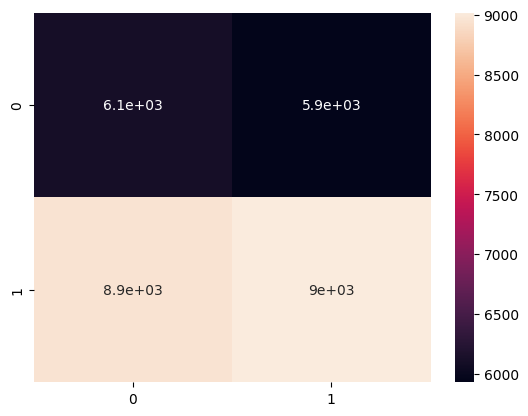

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
# roc-auc
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.5047402780627926


- By default it is 0.5 so no need to set

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate the model
cv_scores = cross_val_score(weighted_logistic_regression, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean Cross-Validation F1 Score: {cv_scores.mean()}")

Cross-Validation F1 Scores: [0.53526862 0.55586502 0.55439276 0.55233536 0.53923358]
Mean Cross-Validation F1 Score: 0.5474190676924925


- When using class weights, it's possible to see a reduction in accuracy because the model is now focusing more on correctly classifying the minority class, which might lead to more false positives. This trade-off can be important if the minority class is of higher importance.

Text(0.5, 1.0, 'Feature Importance')

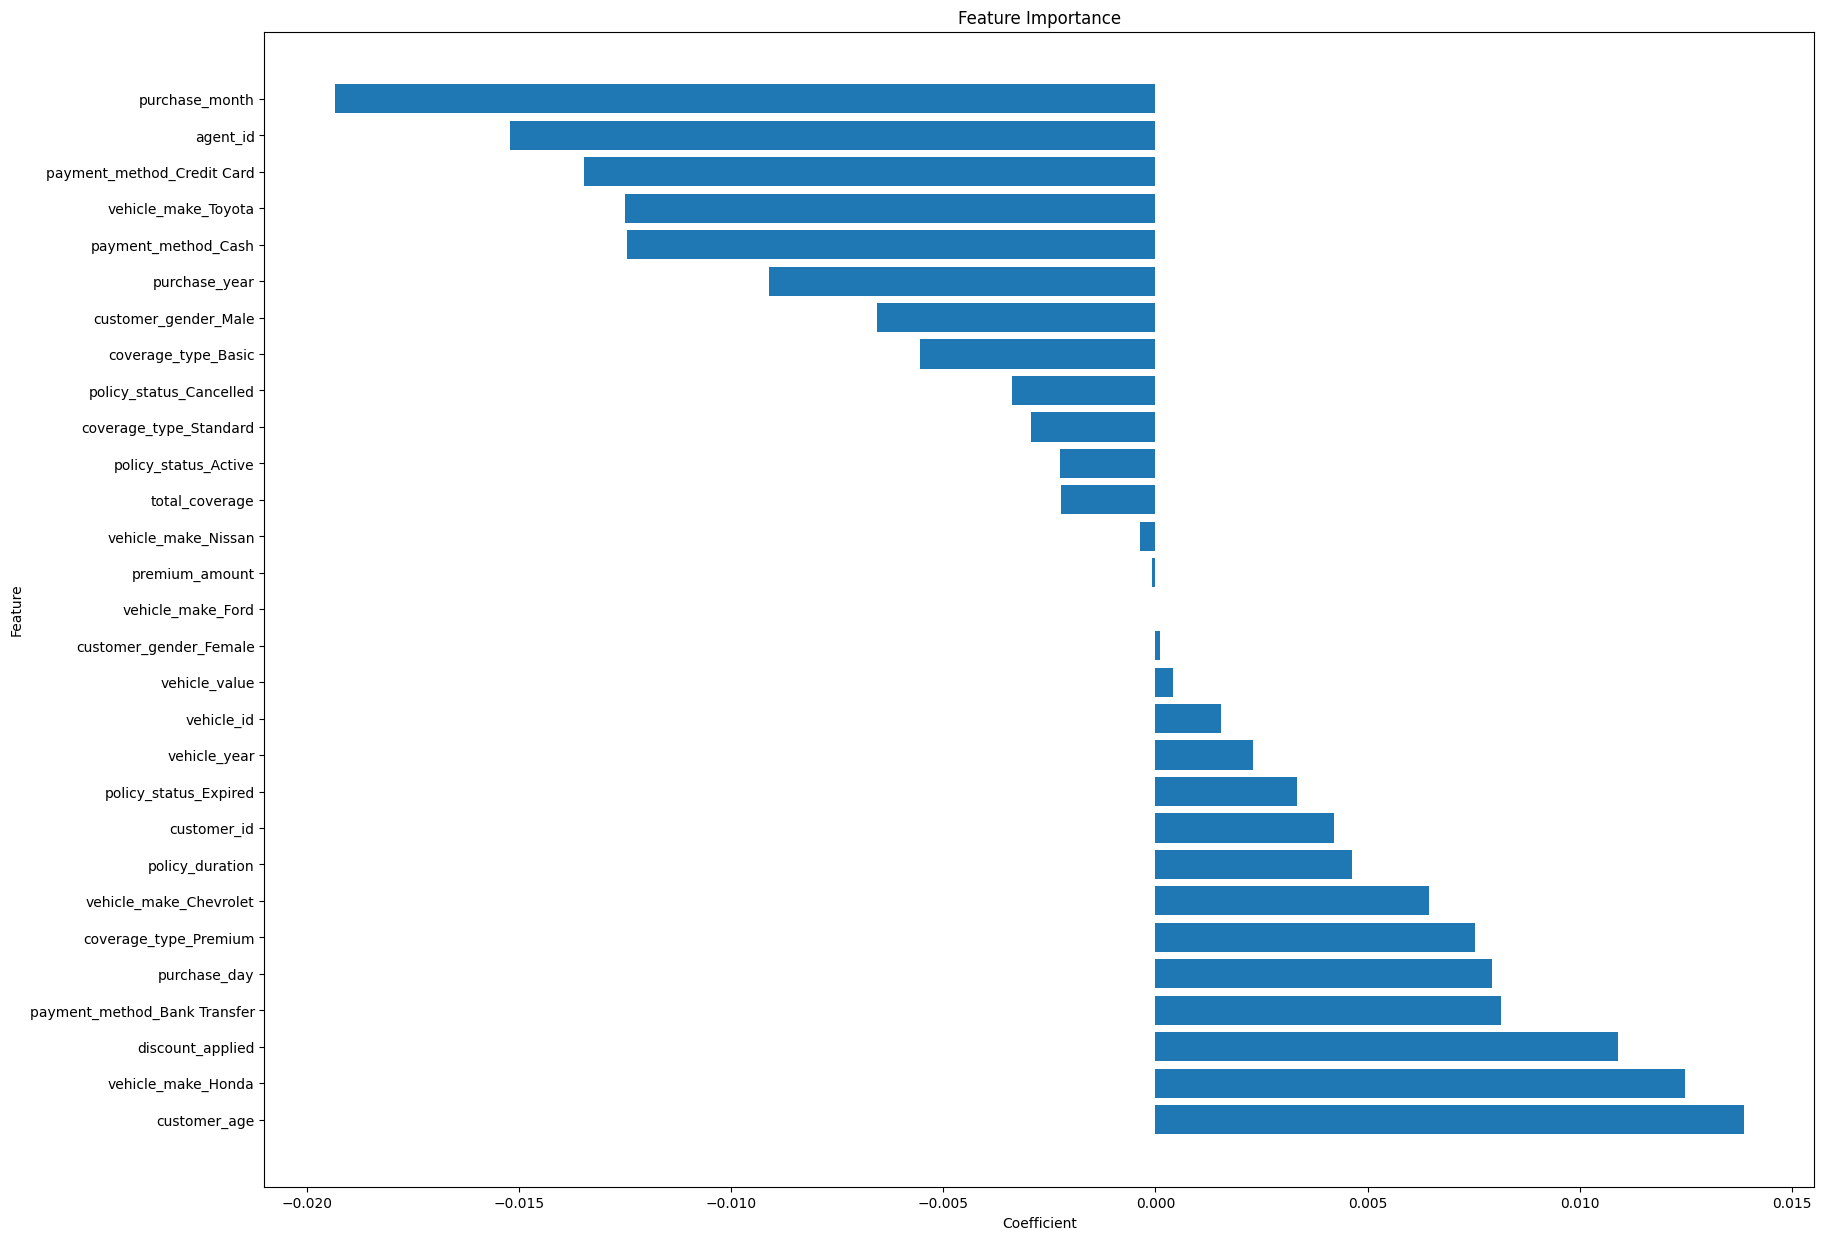

In [ ]:
import pandas as pd

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': weighted_logistic_regression.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot the feature Importance rotate the x-labels
plt.figure(figsize=(20, 15))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')

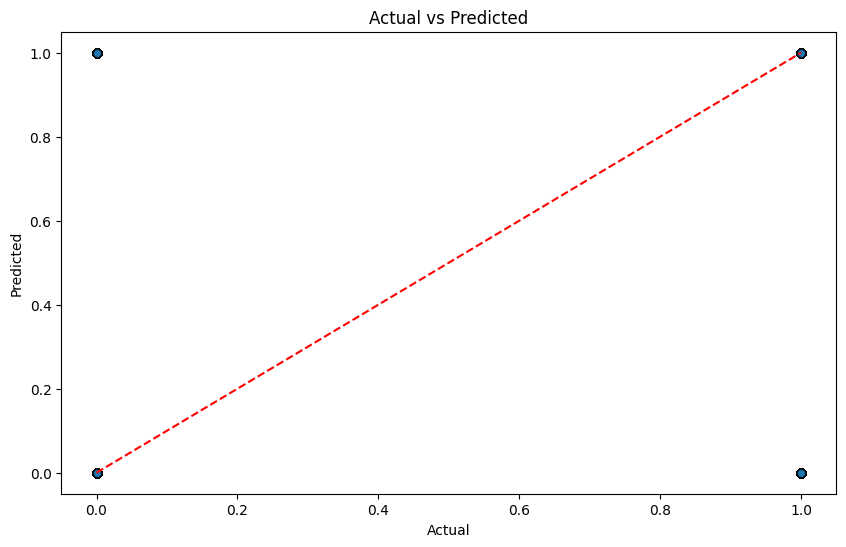

In [ ]:
# Ensure y_test and y_pred are numpy arrays
import numpy as np
y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_threshold, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Feature Importance With Shap

In [ ]:
!pip install shap

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(weighted_logistic_regression, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

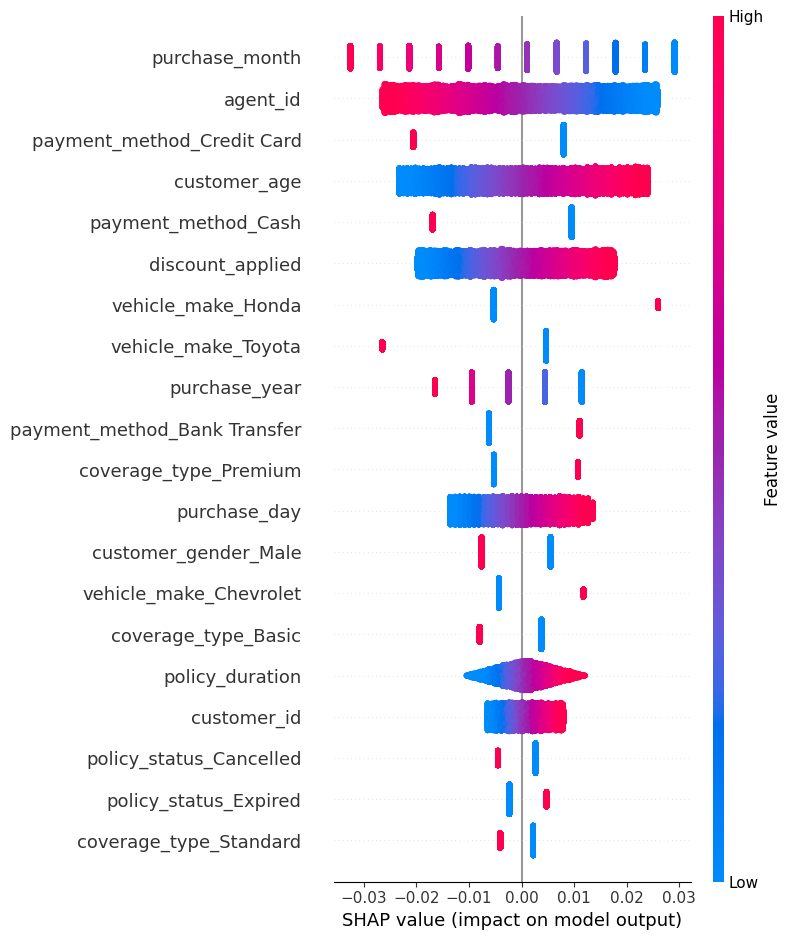

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

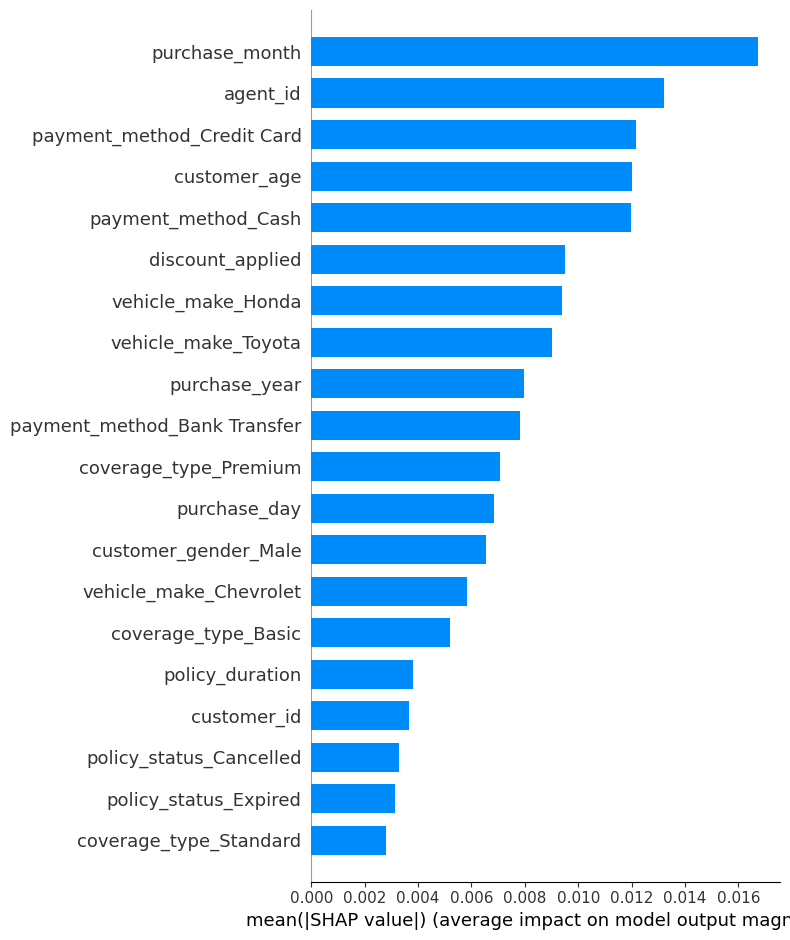

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)


# GBM's